<a href="https://colab.research.google.com/github/sumyah-alk/ML/blob/main/Copy_of_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning
© 2023, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Hotel Bookings
**Objective:**

In this notebook, we are going to go through data cleaning techniques, which are:
- Select and Treat All Missing Value
- Remove unwanted observation (duplicated or irrelevant observation)
- Fix Structure Error in Numerical and Categorical data
- Deal with Correlated variables

## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
%cd machine_learning_certification/

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/machine_learning_certification


We need to get our dataset by using the read_csv function of the pandas library.

In [ ]:
df=pd.read_csv('hotel_bookings.csv')

# 1. Exploring your data / Diagnosis phase

## 1.1 Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the first few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.
- .index: An index for the rows: either row numbers or row names.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Missing values in agent, children, country and company columns (We can see that from the non null count)

In [ ]:
df.index

RangeIndex(start=0, stop=119390, step=1)

## 1.2 Exploratory data analysis

- describe() method is good for checking on numerical columns
- value_counts() is good for checking on categorical columns

#### Check Unique Values for df column to know whether column type is correct or not

In [ ]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  hotel  has different values of: 2
Column name  is_canceled  has different values of: 2
Column name  lead_time  has different values of: 479
Column name  arrival_date_year  has different values of: 3
Column name  arrival_date_month  has different values of: 12
Column name  arrival_date_week_number  has different values of: 53
Column name  arrival_date_day_of_month  has different values of: 31
Column name  stays_in_weekend_nights  has different values of: 17
Column name  stays_in_week_nights  has different values of: 35
Column name  adults  has different values of: 14
Column name  children  has different values of: 5
Column name  babies  has different values of: 5
Column name  meal  has different values of: 5
Column name  country  has different values of: 177
Column name  market_segment  has different values of: 8
Column name  distribution_channel  has different values of: 5
Column name  is_repeated_guest  has different values of: 2
Column name  previous_cancellations  has d

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **boolean:** is_canceled, is_repeated_guest
3. **int:** children, agent, company, ...
4. **date:** reservation_status_date

#### After knowing which columns represent categorical data, let's see the counts of each value in these columns

In [ ]:
df_cat=df[['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']]

for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

Column name is: hotel and its value counts are:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Column name is: is_canceled and its value counts are:
0    75166
1    44224
Name: is_canceled, dtype: int64

Column name is: arrival_date_month and its value counts are:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Column name is: meal and its value counts are:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Column name is: country and its value counts are:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ASM        1
NPL        1
AIA        1
PLW        1
BDI        1
Name: country, Length: 177, dtype: int64

Column name is: market_segment and its v

#### After knowing which columns represent numerical values, lets describe these columns statistically.

In [ ]:
df_numerical=df[['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]
df_numerical.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 1.3 Visual exploratory data analysis

- Sometimes extreme values will stand out much more in a chart
- We use histograms and boxplots for numerical data
- We use bar plots for categorical data

#### Visualizing Numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1cc18e750>,
      dtype=object)

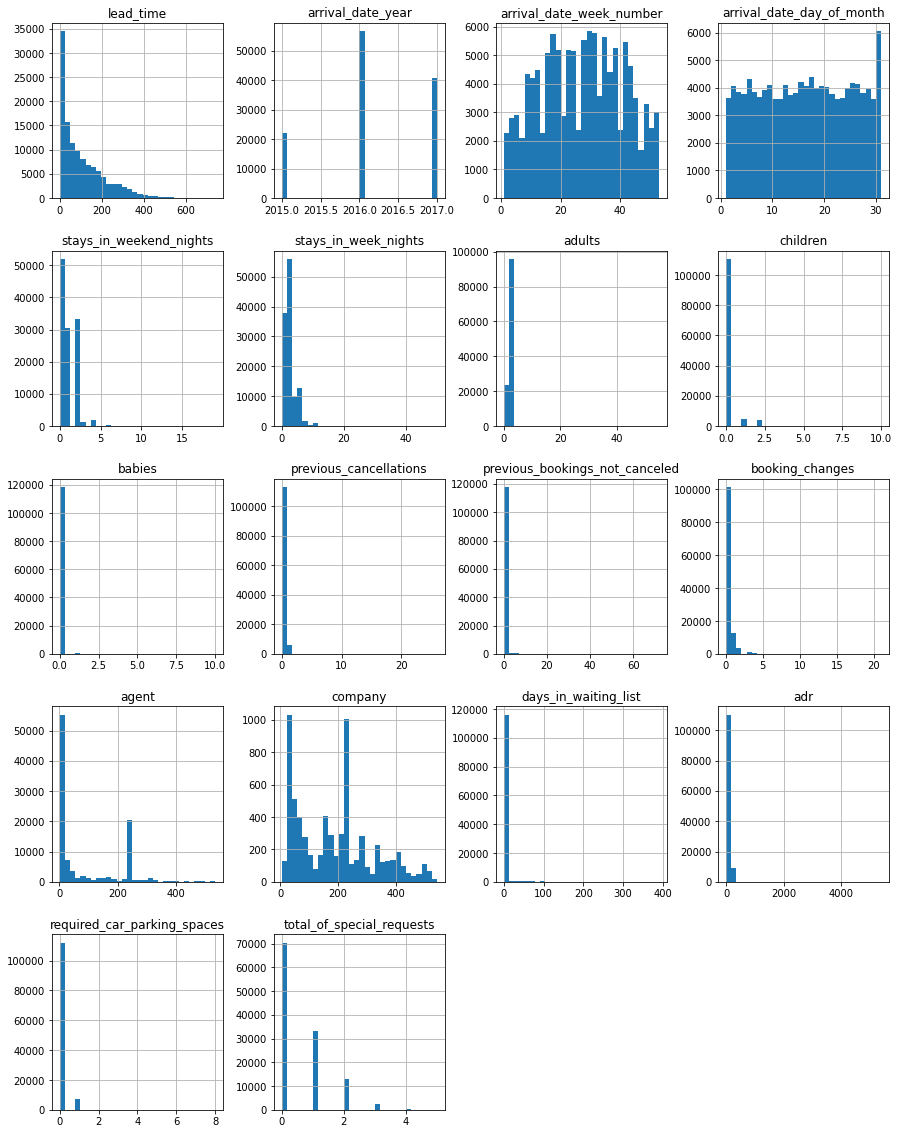

In [ ]:
df_numerical.hist(bins=30, figsize=(15, 20))

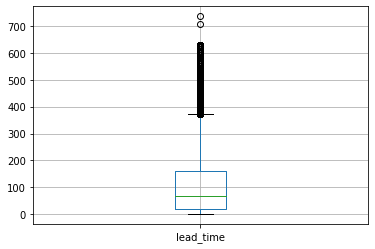

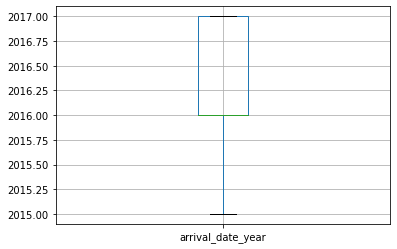

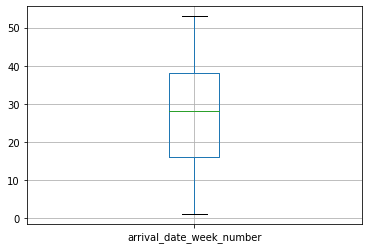

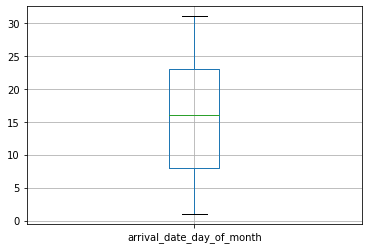

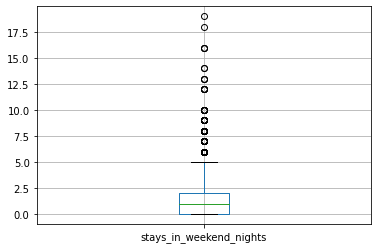

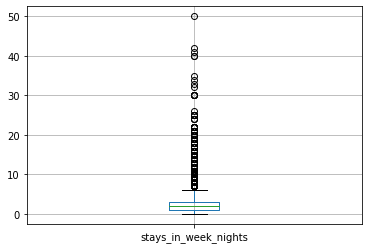

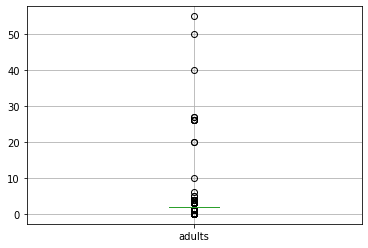

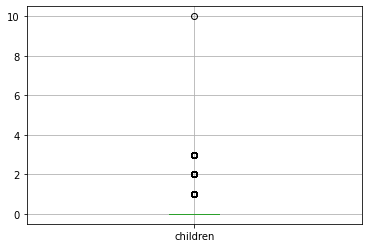

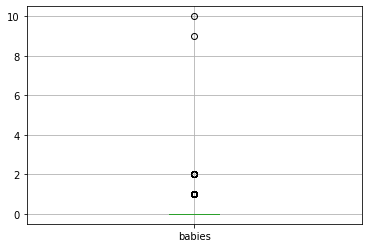

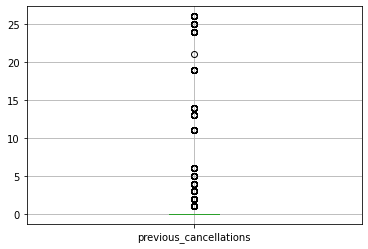

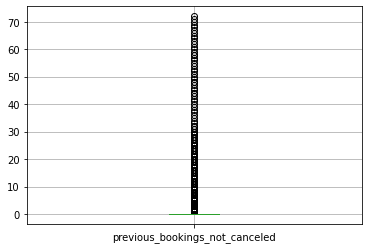

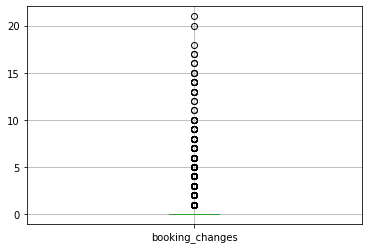

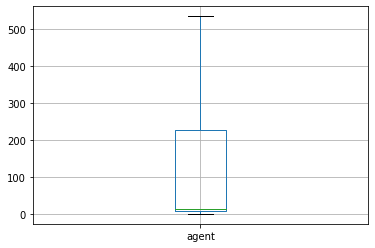

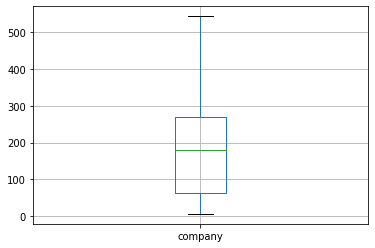

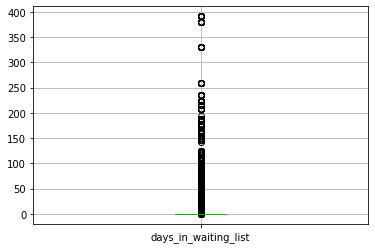

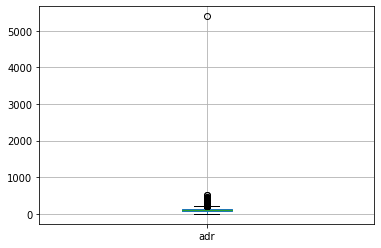

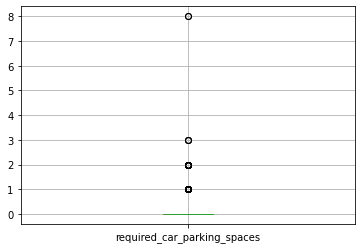

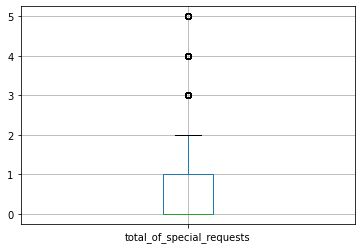

In [ ]:
for column in df_numerical:
    plt.figure()
    df.boxplot([column])

Most of the data columns centered around one value, which are:
    - previous_cancellations
    - days_in_waiting_list
    - required_car_parking_spaces
    - previous_bookings_not_canceled
    - booking_changes
    - children
    - babies
    - adr
    - adult

#### Visualizing Categorical Data

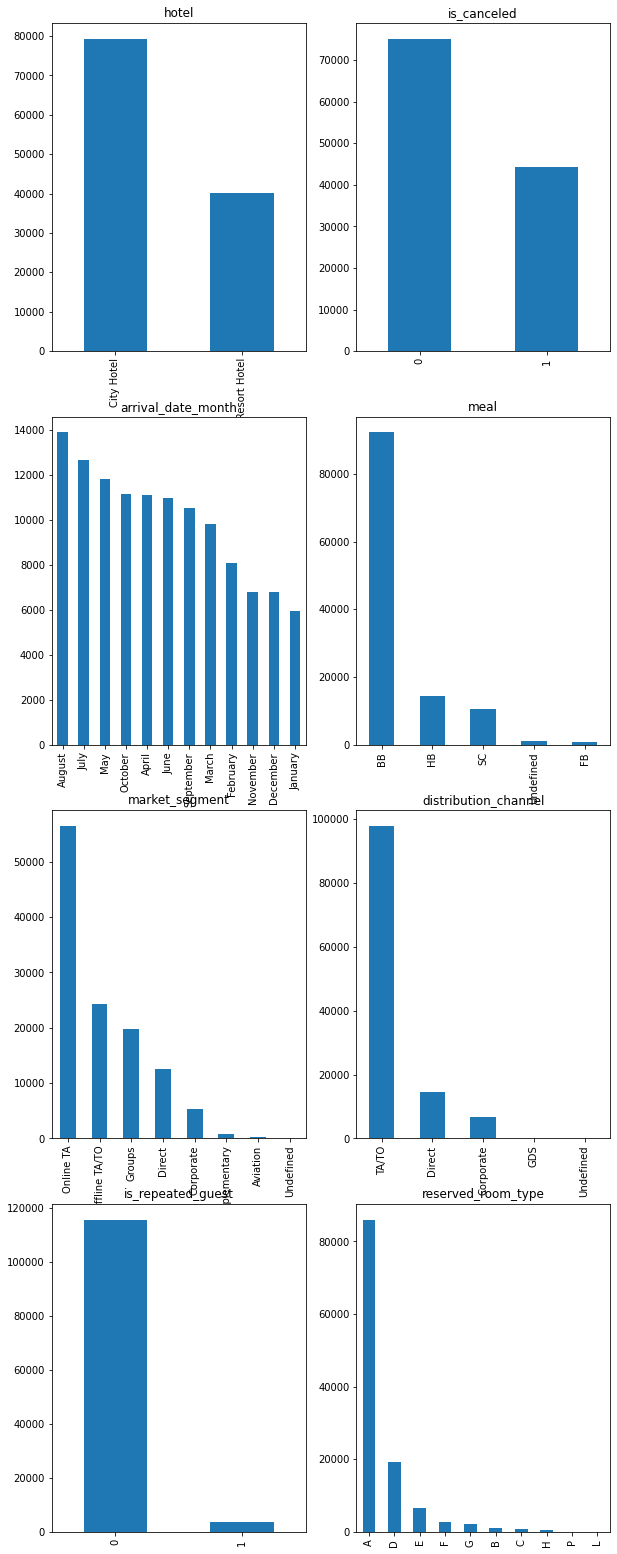

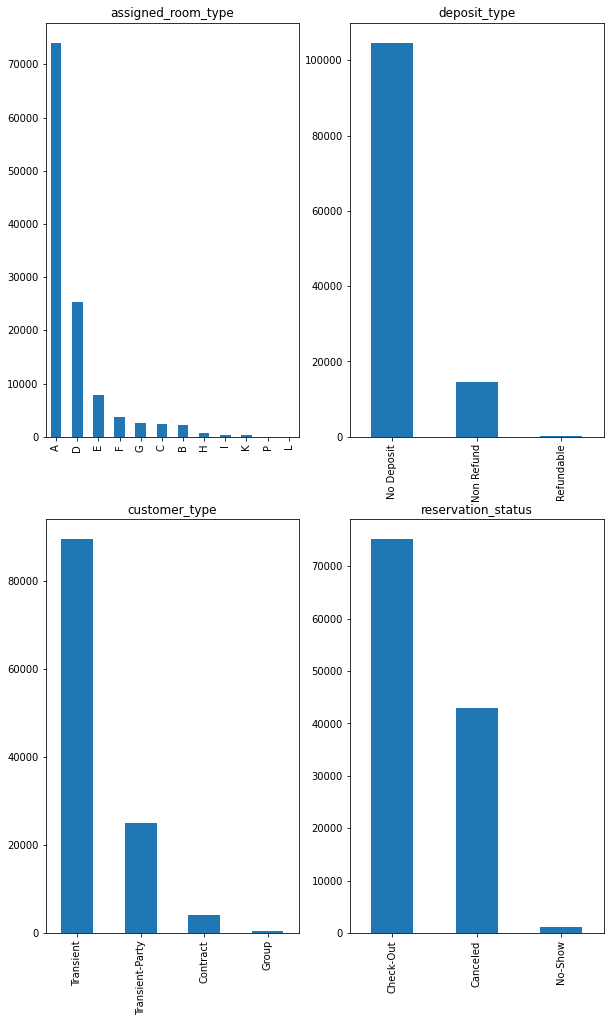

In [ ]:
subplot_num=520
i=1
plt.figure(figsize=(10,35))
for col in df_cat.columns:
    if i==9:
        plt.show()
        plt.figure(figsize=(10,35))
        subplot_num=420
        i=1
    if col=='country':
        continue
    plt.subplot(subplot_num+i)
    i=i+1
    df_cat[col].value_counts().plot.bar(title= col)

# 2. Cleaning data for analysis
- Fix Structure Error for categorical and numerical data
- Deal with Duplicate and missing data


## 2.1 Fix Structure Error

1. Categorical Data
    - Converting categorical data to 'category' dtype:
    - This makes the DataFrame smaller in memory
    - This makes these columns suitable to be utilized by other Python libraries for analysis
<br><br>
2. Numerical data
    - If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.
    - You can either use the some techniques to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.


### Fix data type

#### Categorical data type

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Here's how we change to the category dtype

In [ ]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Below, we confirm that the dtype has changed to category:

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   hotel                 119390 non-null  category
 1   is_canceled           119390 non-null  category
 2   arrival_date_month    119390 non-null  category
 3   meal                  119390 non-null  category
 4   country               118902 non-null  category
 5   market_segment        119390 non-null  category
 6   distribution_channel  119390 non-null  category
 7   is_repeated_guest     119390 non-null  category
 8   reserved_room_type    119390 non-null  category
 9   assigned_room_type    119390 non-null  category
 10  deposit_type          119390 non-null  category
 11  customer_type         119390 non-null  category
 12  reservation_status    119390 non-null  category
dtypes: category(13)
memory usage: 1.6 MB


#### Numerical data type
- convert float to int

In [ ]:
#df_numerical.children=df_numerical.children.astype(int)
#df_numerical.company=df_numerical.company.astype(int)
#df_numerical.agent=df_numerical.agent.astype(int)

ValueError: ignored

Running the code result in exception since we have missing values in children, company and agent columns. Hence, we need to handle missing values before converting to int.

### Clean String Values

Column meal has 4 category: BB, HB, FB, SC, undefined, whereas SC and undefined belong to same category, so we need to group them together.

In [ ]:
df_cat.meal= df_cat.meal.str.replace('SC','Undefined')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_cat.meal.value_counts()

BB           92310
HB           14463
Undefined    11819
FB             798
Name: meal, dtype: int64

## 2.2 Duplicate and missing data

### Check duplicates

Here we chack if there's any duplicated row inside of the dataset

In [ ]:
print(df_numerical.duplicated(subset=None, keep='first').any())
print(df_cat.duplicated(subset=None, keep='first').any())

True
True


### Remove duplicates

Since there are duplicates, we need to remove them

In [ ]:
df_numerical.drop_duplicates(subset=None, keep='first', inplace = True)
df_cat.drop_duplicates(subset=None, keep='first', inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Re-Check duplicates after the remove operation

We double check to make sure there are no duplicates anymore

In [ ]:
print(df_numerical.duplicated(subset=None, keep='first').any())
print(df_cat.duplicated(subset=None, keep='first').any())

False
False


### Check Missing values

Here we need to identify the nulls in our dataset

In [ ]:
print ("Missing values per column:")
print (df_cat.isnull().sum(axis = 0) )
print (df_numerical.isnull().sum(axis = 0) )

Missing values per column:
hotel                     0
is_canceled               0
arrival_date_month        0
meal                      0
country                 251
market_segment            0
distribution_channel      0
is_repeated_guest         0
reserved_room_type        0
assigned_room_type        0
deposit_type              0
customer_type             0
reservation_status        0
dtype: int64
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
agent                             11326
company                           78629
days_in_waiting_list                

#### Fill Missing values

We ususally can fill the nulls with mean, median, mode, etc. <br>
In this example, we chose to fill with the mode.<br>


In [ ]:
# Compute the mode of the country, company, agent, and children columns: country_mode, company_mode, agent_mode, and children_mode
country_mode= df_cat.country.mode()[0]
company_mode = df_numerical.company.mode()[0]
agent_mode = df_numerical.agent.mode()[0]
children_mode = df_numerical.children.mode()[0]

# Replace all the missing values in the company, country, agent, and children columns with the mode of that column
df_cat.country.fillna(country_mode,inplace=True)
df_numerical.company.fillna(company_mode,inplace=True)
df_numerical.agent.fillna(agent_mode,inplace=True)
df_numerical.children.fillna(children_mode, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#### Re-Check Missing values

Here we make sure that there are no missing values anymore

In [ ]:
print ("Missing values per column:")
df_cat.info()
df_numerical.info()

Missing values per column:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24632 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   hotel                 24632 non-null  category
 1   is_canceled           24632 non-null  category
 2   arrival_date_month    24632 non-null  category
 3   meal                  24632 non-null  object  
 4   country               24632 non-null  category
 5   market_segment        24632 non-null  category
 6   distribution_channel  24632 non-null  category
 7   is_repeated_guest     24632 non-null  category
 8   reserved_room_type    24632 non-null  category
 9   assigned_room_type    24632 non-null  category
 10  deposit_type          24632 non-null  category
 11  customer_type         24632 non-null  category
 12  reservation_status    24632 non-null  category
dtypes: category(12), object(1)
memory usage: 706.4+ KB
<class 'pandas.core.frame.D

### Convert float to int

Now that we've dealt with missing values, we can change the data type from float to int.

*(Side note: integer arithmetics are faster than those of floats!)*

In [ ]:
df_numerical.children=df_numerical.children.astype(int)
df_numerical.company=df_numerical.company.astype(int)
df_numerical.agent=df_numerical.agent.astype(int)

#Check the conversion
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83387 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       83387 non-null  int64  
 1   arrival_date_year               83387 non-null  int64  
 2   arrival_date_week_number        83387 non-null  int64  
 3   arrival_date_day_of_month       83387 non-null  int64  
 4   stays_in_weekend_nights         83387 non-null  int64  
 5   stays_in_week_nights            83387 non-null  int64  
 6   adults                          83387 non-null  int64  
 7   children                        83387 non-null  int64  
 8   babies                          83387 non-null  int64  
 9   previous_cancellations          83387 non-null  int64  
 10  previous_bookings_not_canceled  83387 non-null  int64  
 11  booking_changes                 83387 non-null  int64  
 12  agent                          

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# 3. Check Correlations

## Identify Highly Correlated Variables

Here, we will check variables that are correlated by a factor larger than 0.75 and only keep one of them. <br>

**Note:** We take the upper triangle of the matrix because it's the same as the lower one and that's because<br>
`Correlation (var1, var2) = Correlation (var2, var1)`, i.e. the matrix is *symmetric*

In [ ]:
# Create correlation matrix
corr_matrix = df_numerical.corr().abs()
print("Correlation Matrix:")
print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Columns to drop:")
print(to_drop)

Correlation Matrix:
                                lead_time  ...  total_of_special_requests
lead_time                        1.000000  ...                   0.039507
arrival_date_year                0.146643  ...                   0.055945
arrival_date_week_number         0.099313  ...                   0.049210
arrival_date_day_of_month        0.009155  ...                   0.000293
stays_in_weekend_nights          0.249026  ...                   0.027582
stays_in_week_nights             0.322176  ...                   0.032740
adults                           0.145085  ...                   0.102587
children                         0.034450  ...                   0.039771
babies                           0.002347  ...                   0.094704
previous_cancellations           0.005273  ...                   0.001163
previous_bookings_not_canceled   0.080371  ...                   0.025692
booking_changes                  0.077823  ...                   0.019687
agent             

As you've seen, there are no columns to drop because there are no variables correlated by more than 75%.